# Pokemon Image Classification

add an introduction paragraph here or something

## Package Import

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import zipfile
import os
from pathlib import Path
import re
import tensorflow as tf
from tensorflow import keras
from keras import layers

## Merging Data

In [22]:
train_dir = "data/images/images/"
train_path = Path(train_dir)

# Creating a dataframe with the name and filepath of each Pokemon
files = list(train_path.glob("*.png"))
names = [os.path.split(filename)[1] for filename in files]
image_df = pd.concat(
    [pd.Series(names, name="Name"), pd.Series(files, name="Filepath").astype(str)],
    axis=1,
)
image_df["Name"] = image_df["Name"].apply(lambda x: re.sub(r"\.\w+$", "", x))

# Importing label_df
label_df = pd.read_csv("data/pokemon.csv")

# Merging so we have one dataframe with pokemon information and filepath to image
df = image_df.merge(label_df, on="Name")

df.head()

,Name,Filepath,Type1,Type2
0,abomasnow,data\images\images\abomasnow.png,Grass,Ice
1,abra,data\images\images\abra.png,Psychic,NaN
2,absol,data\images\images\absol.png,Dark,NaN
3,accelgor,data\images\images\accelgor.png,Bug,NaN
4,aegislash-blade,data\images\images\aegislash-blade.png,Steel,Ghost


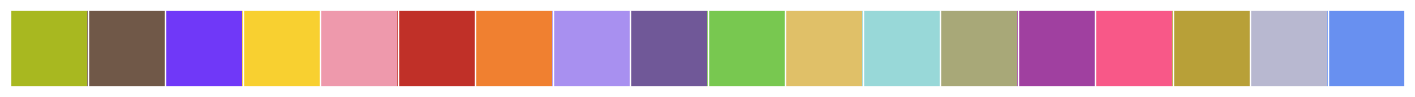

In [23]:
custom_colors = {
    "Bug": "#a8b820",
    "Dark": "#705848",
    "Dragon": "#7038f8",
    "Electric": "#f8d030",
    "Fairy": "#ee99ac",
    "Fighting": "#c03028",
    "Fire": "#f08030",
    "Flying": "#a890f0",
    "Ghost": "#705898",
    "Grass": "#78c850",
    "Ground": "#e0c068",
    "Ice": "#98d8d8",
    "Normal": "#a8a878",
    "Poison": "#a040a0",
    "Psychic": "#f85888",
    "Rock": "#b8a038",
    "Steel": "#b8b8d0",
    "Water": "#6890f0",
}

sns.set(font_scale=1.25)
sns.set_palette(sns.color_palette(custom_colors.values()))
sns.palplot(sns.color_palette(custom_colors.values()), size=1)

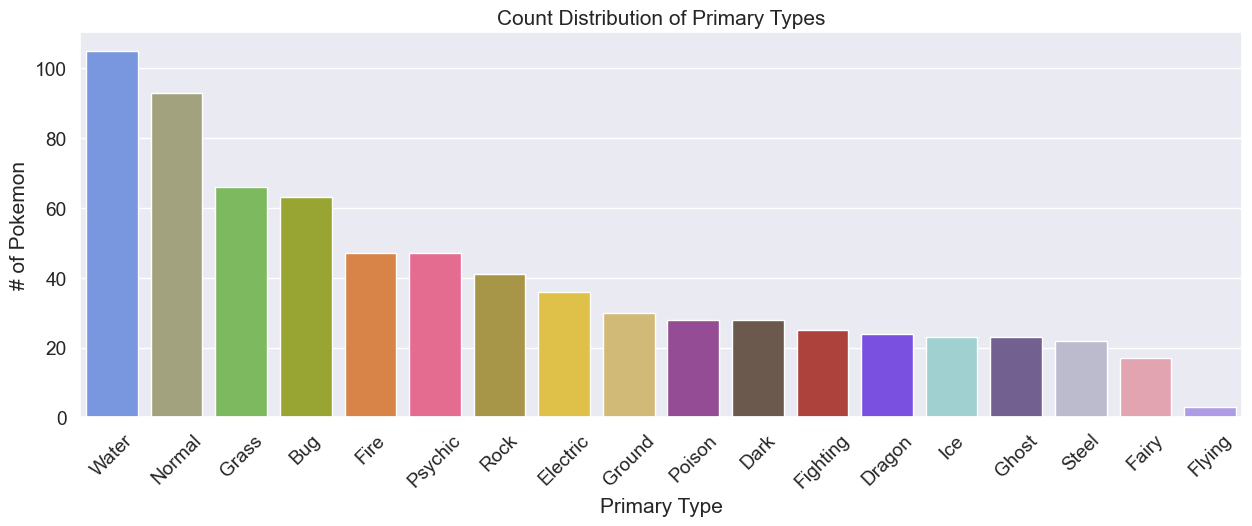

In [27]:
# Find the number of each type of pokemon
type1_data = (
    df["Type1"].value_counts().rename_axis("Type1").reset_index(name="# of Pokemon")
)

# Plot number of each type of pokemon with custom colors
plt.figure(figsize=(15, 5))
plt.title("Count Distribution of Primary Types")
ax = sns.barplot(x="Type1", y="# of Pokemon", data=type1_data, palette=custom_colors)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="center")
ax.set_xlabel("Primary Type")
plt.show()

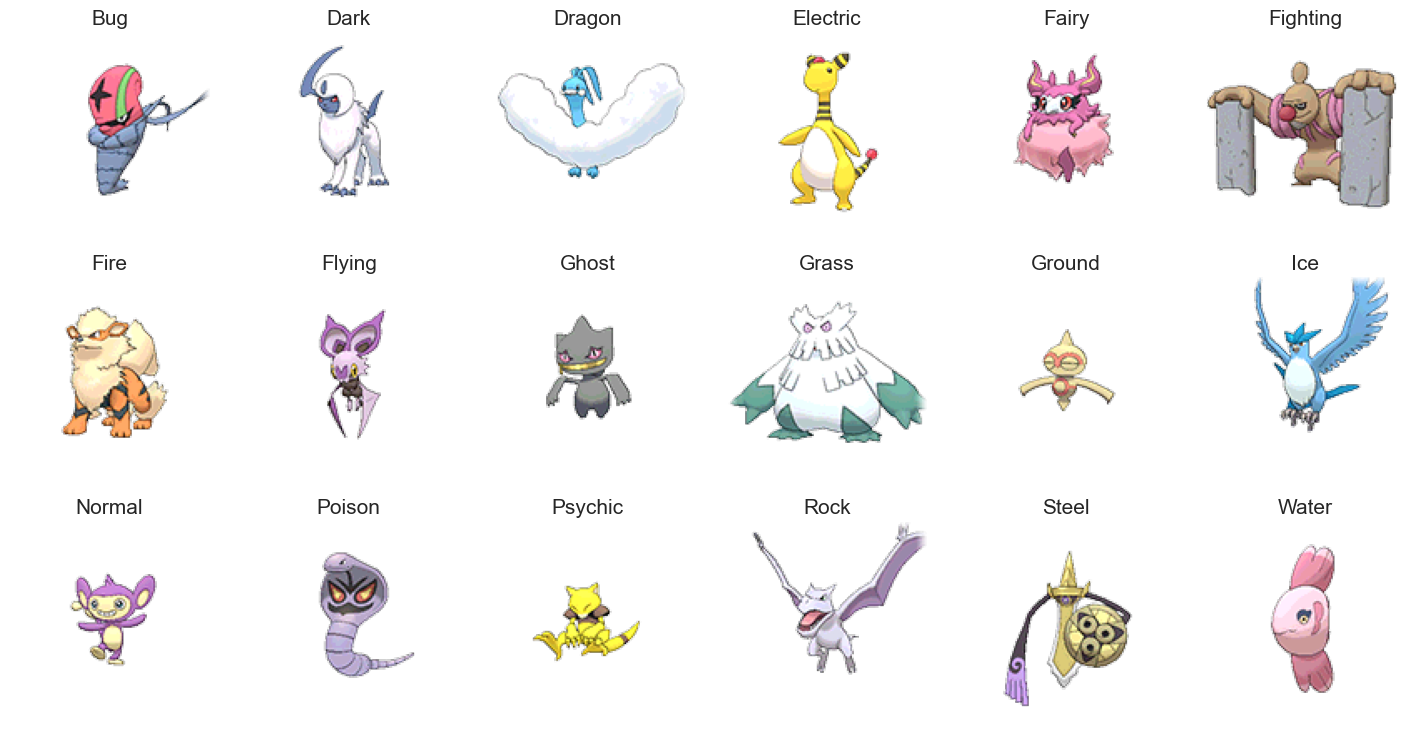

In [37]:
# Getting examples of pokemon of each type
type1 = list(custom_colors.keys())
first_row_indices = []
for type in type1:
    first_row_indices.append(df[df["Type1"] == type].index[0])

# Get images from filepaths
imgs = []
for index in first_row_indices:
    imgs.append(mpimg.imread(df.iat[index, 1]))

# Displaying an example of each pokemon primary type
f, axarr = plt.subplots(3, 6, figsize=(18, 9))
count = 0
for r in range(3):
    for c in range(6):
        axarr[r, c].imshow(imgs[count])
        axarr[r, c].set_title(type1[count])
        axarr[r, c].set_axis_off()
        count += 1

plt.show()

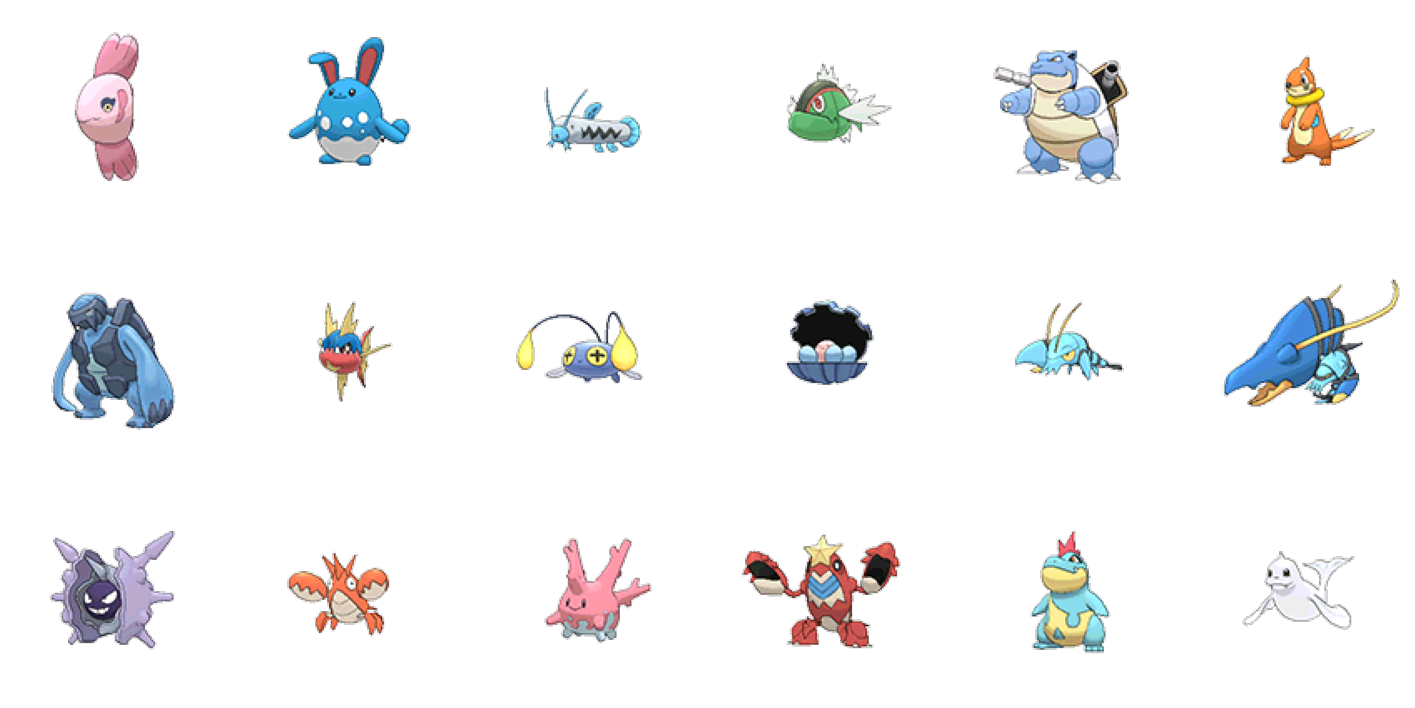

In [39]:
# Showing how appearances change within a single type
water_indices = []
for i in range(len(df.index)):
    if df.iat[i, 2] == "Water":
        water_indices.append(i)

water_imgs = []
for index in water_indices:
    water_imgs.append(mpimg.imread(df.iat[index, 1]))

f, axarr = plt.subplots(3, 6, figsize=(18, 9))
count = 0
for r in range(3):
    for c in range(6):
        axarr[r, c].imshow(water_imgs[count])
        axarr[r, c].set_axis_off()
        count += 1

plt.show()